# Tutorial 7 (b)
# Holt-Winters Exponential Smoothing

In [1]:
# Load the libraries
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES # Holt-winter exponential analysis

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [12]:
# Read the data set into a Pandas data frame. Note that the Date column (column 0) is the index column and it has 
# the format mm-dd-yyyy.
df = pd.read_csv('retail_sales_used_car_dealers_us_1992_2020.csv', index_col = [0])

# By default, date columns are represented as object when loading data from a CSV file. To read the date column correctly, 
# we can use the argument parse_dates to specify a list of date columns.

df.head(20)

,Retail_Sales
DATE,
01-01-92,1744
01-02-92,1990
01-03-92,2177
01-04-92,2601
01-05-92,2171


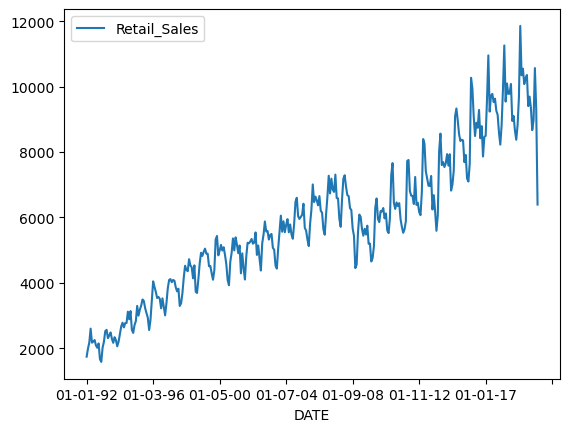

In [4]:
# Plot the data:
df.plot()

# Show the plot
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 01-01-92 to 01-04-20
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Retail_Sales  340 non-null    int64
dtypes: int64(1)
memory usage: 5.3+ KB


In [6]:
df.iloc[-12:]

,Retail_Sales
DATE,
01-05-19,10549
01-06-19,10078
01-07-19,10255
01-08-19,10357
01-09-19,9404
01-10-19,9696
01-11-19,9355
01-12-19,8669
01-01-20,8971


In [7]:
# Split between the training and the test data sets. The last 12 periods form the test data.
df_train = df.iloc[:-12]    # Remove last 12 rows
df_test = df.iloc[-12:]     # Consider only last 12 rows

# Display the size of the dataframes
df_train.shape, df_test.shape

((328, 1), (12, 1))

In [8]:
# Build and train the model on the training data. In the above chart, the level of the time series seems to be 
# increasing linearly. So we set the trend as additive. However, the seasonal variation around each level seems to be 
# increasing in proportion to the current level. So we set the seasonality to multi plicative.
model = HWES(df_train, seasonal_periods = 12, trend = 'add', seasonal = 'mul') # calling the model here and storing in the 'model' variable.

# Train the model
fitted = model.fit()

In [9]:
# Print out the training summary.
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Retail_Sales   No. Observations:                  328
Model:             ExponentialSmoothing   SSE                       23360788.625
Optimized:                         True   AIC                           3696.926
Trend:                         Additive   BIC                           3757.615
Seasonal:                Multiplicative   AICC                          3699.140
Seasonal Periods:                    12   Date:                 Tue, 09 Apr 2024
Box-Cox:                          False   Time:                         16:35:20
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3939537                alpha                 True
smoothing_trend          

In [10]:
# Create an out of sample forecast for the next 12 steps beyond the final data point in the training data set.
sales_forecast = fitted.forecast(steps = 12)

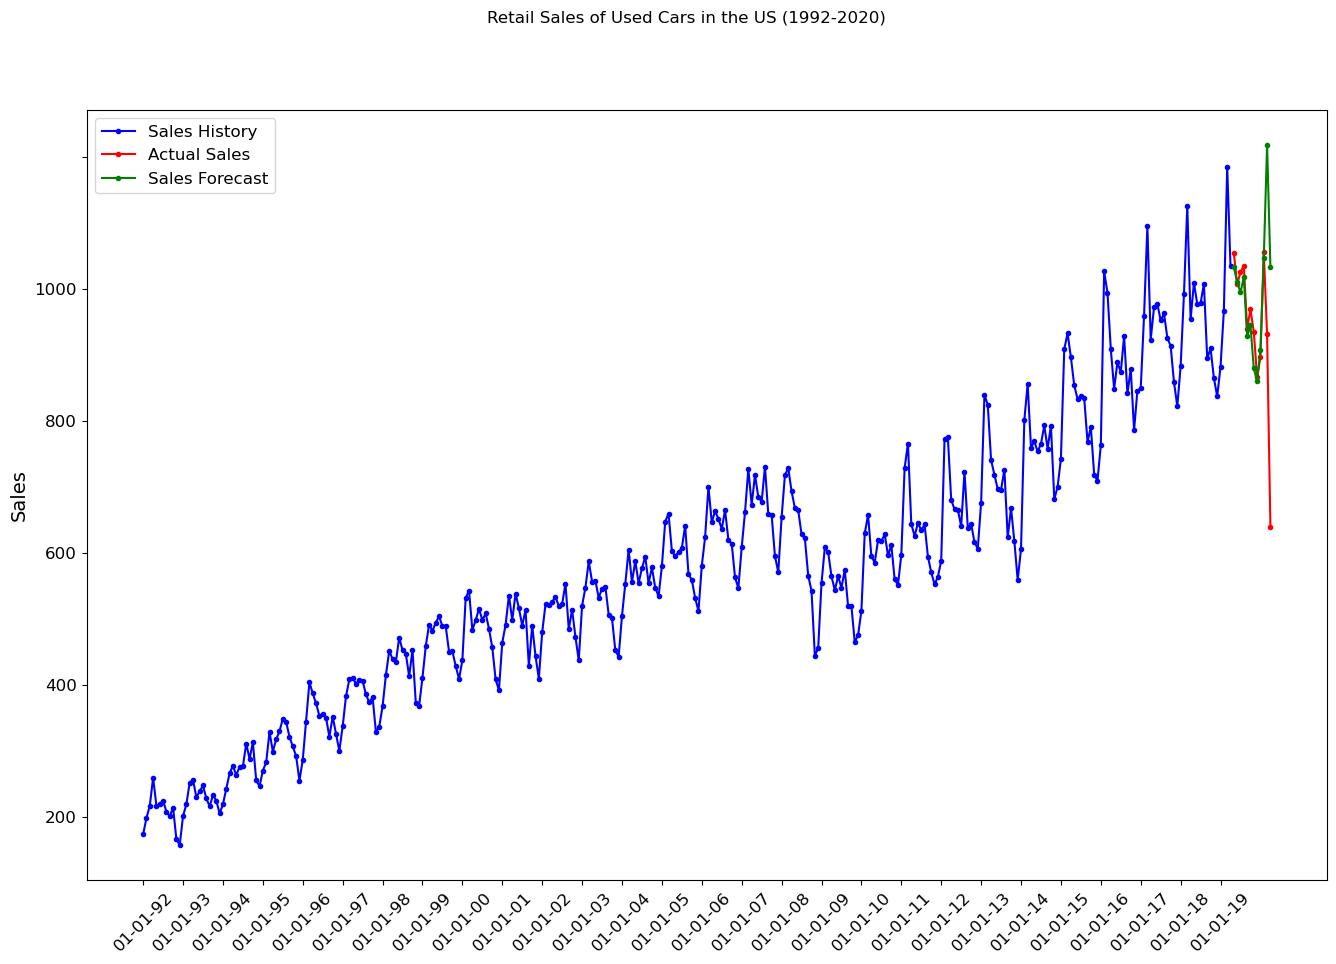

In [11]:
import matplotlib.pyplot as plt

# Define the desired y-axis tick values
yticks = [0, 200, 400, 600, 800, 1000]

# Define the x-axis tick locations (subset of dates to display)
x_ticks = df_train.index[::12]  # Display every 12th date

# Plot the training data, the test data, and the forecast on the same plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')

past, = ax.plot(df_train, 'b.-', label='Sales History')
future, = ax.plot(df_test, 'r.-', label='Actual Sales')
predicted_future, = ax.plot(sales_forecast, 'g.-', label='Sales Forecast')

# Customize the appearance of x-axis and y-axis labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)
ax.set_yticklabels(yticks, fontsize=12)
ax.set_ylabel('Sales', fontsize=14)

ax.legend(handles=[past, future, predicted_future], fontsize=12)

plt.show()


It is clear from the last part of the time series data that the forecast lags behind sharp turning points as it rightly should for any moving average based forecasting technique.

<b> We consider a Time Series data for the number of International Airline Passengers (in thousands) between January 1949 to December 1960. </b>

In [13]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
# Let’s just quickly import the data and see how it looks. We will also check the shape of the dataframe and a few data points.
df_airline = pd.read_csv('airline-passengers.csv', index_col = 'Month', parse_dates = True)

# parse_dates = True, By default, date columns are represented as object when loading data from a CSV file. 
# To read the date column correctly, we can use the argument parse_dates to specify a list of date columns.

# Display first five records
df_airline.head(20)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [16]:
# finding shape of the dataframe
print(df_airline.shape)

(144, 1)


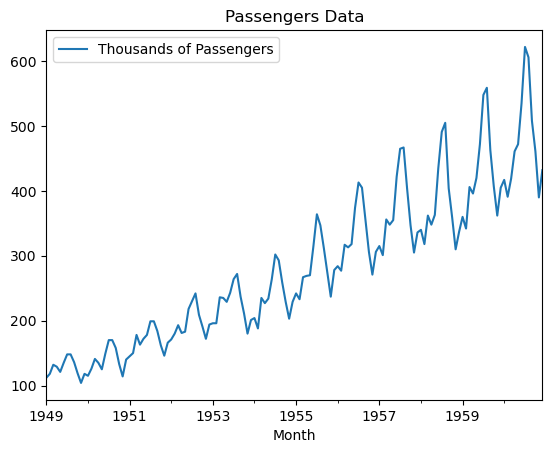

In [18]:
# plotting the original data
df_airline[['Thousands of Passengers']].plot(title = 'Passengers Data');

## Decomposing the Time Series
Now we decompose the Time Series and will look for Levels, Trends and Seasonality in the data.

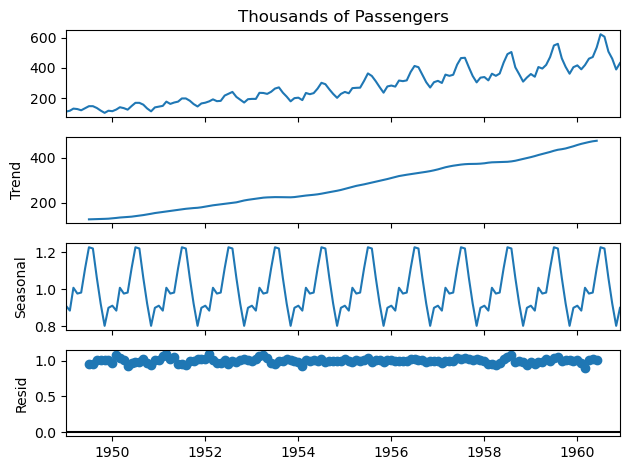

In [19]:
# Store the results for seasonal decomposition using seasonal_decompose()
decompose_result = seasonal_decompose(df_airline['Thousands of Passengers'], model = 'multiplicative')

# Display the results using plot() function
decompose_result.plot()

plt.show()

We can quite clearly see that the data has all 3, Levels, Trends, Seasonality.
## Fitting the Data with Holt-Winters Exponential Smoothing
Now we shall fit this data on Single, Double, and Triple Exponential Smoothing respectively, and will see how it performs.

Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.

In [20]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df_airline.index.freq = 'MS'

# Set the value of Alpha and define m (Time Period)
# If we have a daily data, the m=356 because it takes 365 days to repeat year
m = 12 # This is how long it takes to repeat another year. In ths case, the data is yearly 12months so in the next 12 months we will have another year
alpha = 1/(2 * m)
print(alpha)

0.041666666666666664


Now, we fit the data on the Single Exponential Smoothing,
# Single HWES

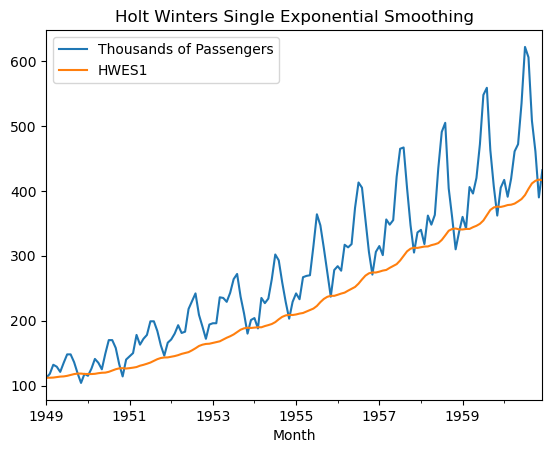

In [21]:
# Create a new column (HWES1) in the dataframe (df_airline)
df_airline['HWES1'] = SimpleExpSmoothing(df_airline['Thousands of Passengers']).fit(
                                                    smoothing_level = alpha, optimized = False, use_brute = True).fittedvalues

# plot the values of 'Thousands of Passengers' and 'HWES1'
df_airline[['Thousands of Passengers','HWES1']].plot(title = 'Holt Winters Single Exponential Smoothing');

It is clear from the above plot that forecast did not fit quite well. We used simple exponential smoothing (SES) and it doesn’t work for data with Trends and Seasonality.

# Double HWES

So, we’d fit the data on Double ES on both Additive and Multiplicative Trend.

<Axes: title={'center': 'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Month'>

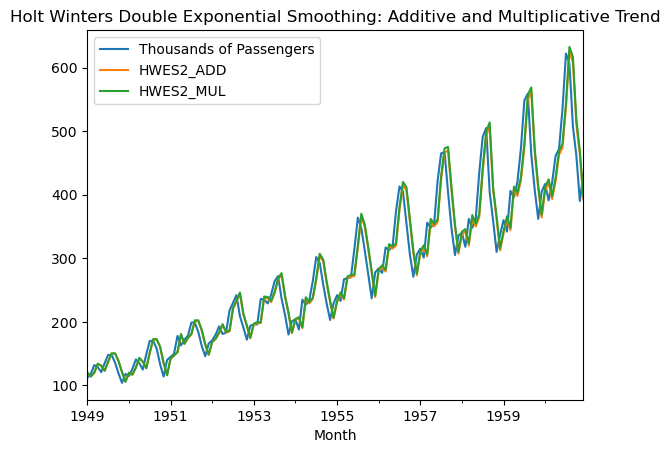

In [22]:
# Call a method for double ExponentialSmoothing and more columns into df_airline
df_airline['HWES2_ADD'] = ExponentialSmoothing(df_airline['Thousands of Passengers'], trend = 'add').fit().fittedvalues # Additive method 
df_airline['HWES2_MUL'] = ExponentialSmoothing(df_airline['Thousands of Passengers'], trend = 'mul').fit().fittedvalues # Multiplicative method

# plot the dataframe columns as mentioned in the df_airline dataframe.
df_airline[['Thousands of Passengers', 'HWES2_ADD', 'HWES2_MUL']].plot(
                                        title = 'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

It has been observed from the avobe plot that It forecasts better better than the previous one, but since we know there is Seasonality, we shall move into Triple ES and look at how it fits.

# Triple HWES

<Axes: title={'center': 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='Month'>

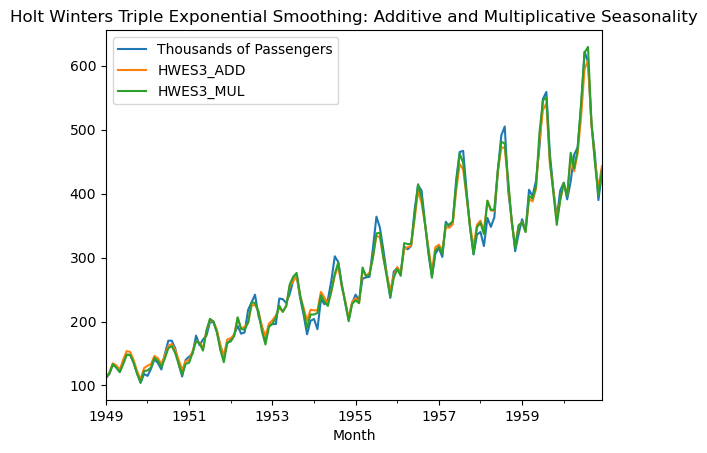

In [17]:
# Include the trend and season for two different cases such as 'add' and 'mul'. Add new columns into dataframe 'df_airline'
df_airline['HWES3_ADD'] = ExponentialSmoothing(df_airline['Thousands of Passengers'], 
                                               trend = 'add', seasonal = 'add', seasonal_periods = 12).fit().fittedvalues

df_airline['HWES3_MUL'] = ExponentialSmoothing(df_airline['Thousands of Passengers'], 
                                               trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit().fittedvalues

# plot the dataset for three columns, 'Thousands of Passengers','HWES3_ADD','HWES3_MUL'
df_airline[['Thousands of Passengers','HWES3_ADD','HWES3_MUL']].plot(
                                  title = 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

Using Triple Exponential smoothing, the forecast is exactly matched and we have obtained promising results using both Additive and Multiplicative Seasonality.

# Forecasting with Holt-Winters Exponential Smoothing (Triple ES)
Let’s try and forecast sequences, we divide the dataset ('airline-passengers.csv') into Train and Test sets. We have taken 120 data points as Train set and the last 24 data points as Test set.

In [23]:
# Load the data from the data file
forecast_data = pd.read_csv('airline-passengers.csv', index_col = 'Month', parse_dates = True)

# MS means multiplicative seasonality
forecast_data.index.freq = 'MS'

# Split into train and test set
train_airline = forecast_data[:120]
test_airline = forecast_data[120:]

train_airline.shape, test_airline.shape

((120, 1), (24, 1))

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

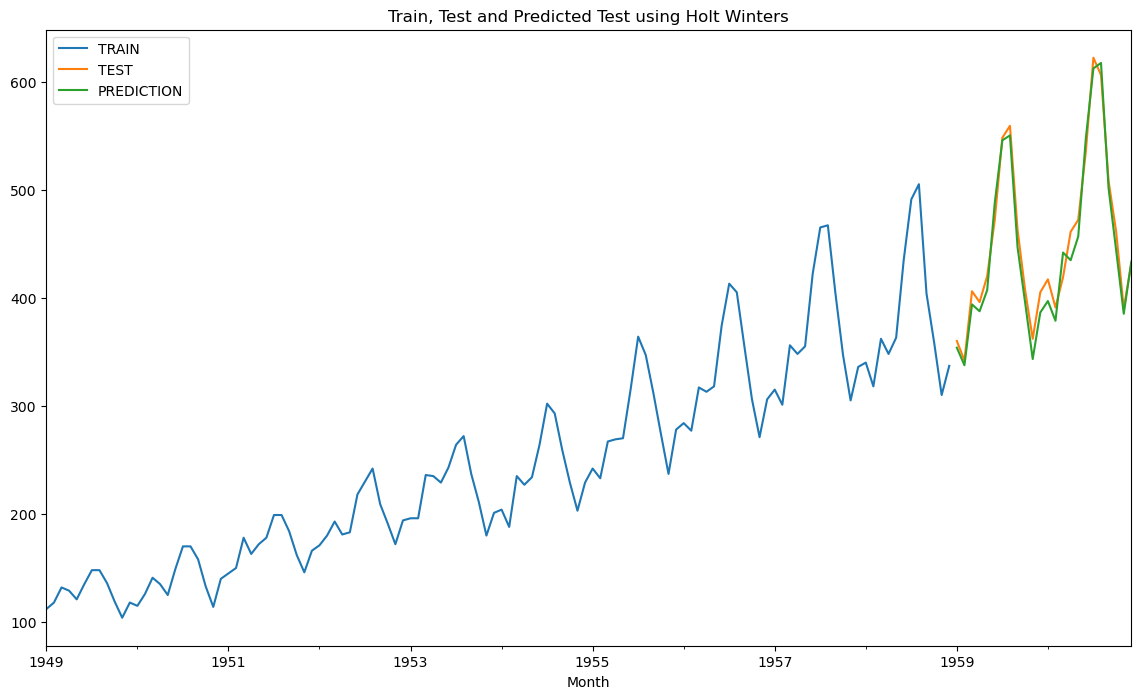

In [25]:
# Call ExponentialSmoothing() for the train_airline['Thousands of Passengers'] dataset
fitted_model = ExponentialSmoothing(train_airline['Thousands of Passengers'],
                                    trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit()

# The number of out of sample forecasts from the end of the sample.
test_predictions = fitted_model.forecast(24)

train_airline['Thousands of Passengers'].plot(legend = True, label = 'TRAIN')
test_airline['Thousands of Passengers'].plot(legend = True, label = 'TEST', figsize = (14, 8))
test_predictions.plot(legend = True, label = 'PREDICTION')

# Display the title of the figure
plt.title('Train, Test and Predicted Test using Holt Winters')

It is evident from the above plot that we are close in on the forecasted segment, it seems that the model has done a decent job overall.

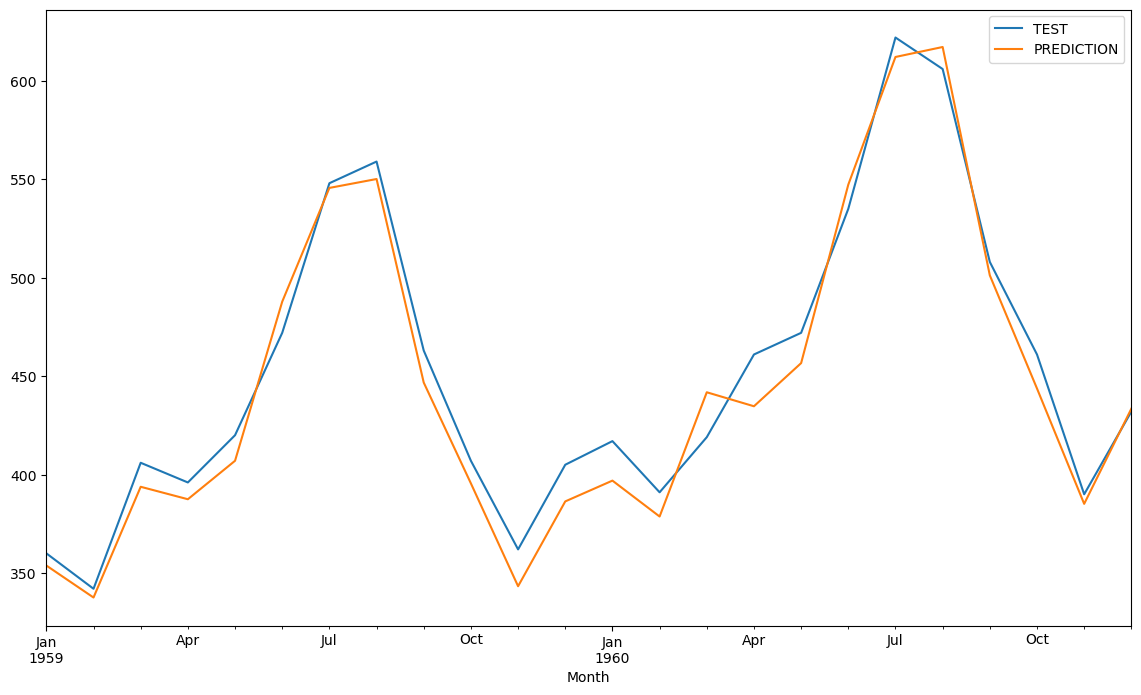

In [26]:
# Testing and Prediction results
test_airline['Thousands of Passengers'].plot(legend = True, label = 'TEST', figsize = (14, 8))
test_predictions.plot(legend = True,label = 'PREDICTION');

## Mean Absolute Error (MAE)
Mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as

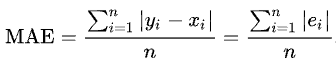

In [27]:
from IPython.display import Image
Image(filename =r'MAE.png')

## Evaluation Metrics
Let’s see how the model has fared in terms of error term calculations. We would be using MAE(Mean Absolute Error) and MSE(Mean Squared Error) as metrics.

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f'Mean Absolute Error = {mean_absolute_error(test_airline, test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_airline, test_predictions)}')
print(f'r^2 score = {r2_score(test_airline, test_predictions)}')

Mean Absolute Error = 12.380537449387745
Mean Squared Error = 192.61004182257628
r^2 score = 0.9654615680325325


## Single, Double and Triple Exponential Smoothing

R2 Score (SES): -2.38
R2 Score (Holt): 0.77
R2 Score (Holt-Winters): 0.77


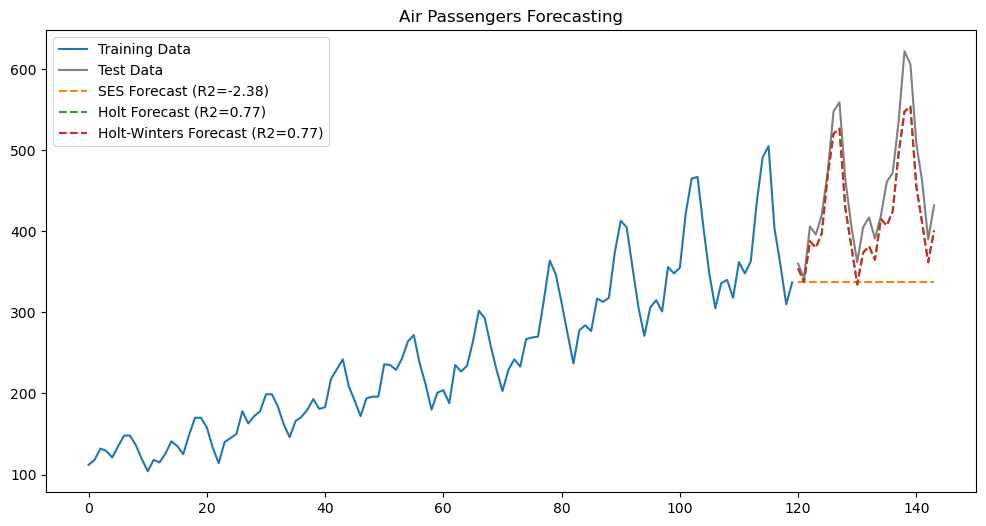

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import r2_score

# Load the Air Passengers dataset
data = sns.load_dataset('flights')
passengers = data['passengers']

# Split the data into training and testing sets
train_data = passengers[:120]  # 1949-01 to 1958-12 (10 years)
test_data = passengers[120:]   # 1959-01 to 1960-12 (2 years)

# Simple Exponential Smoothing
model_ses = SimpleExpSmoothing(train_data).fit(optimized=True)
forecast_ses = model_ses.forecast(steps=len(test_data))
r2_ses = r2_score(test_data, forecast_ses)

# Holt's Method (Double Exponential Smoothing)
model_holt = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)
forecast_holt = model_holt.forecast(steps=len(test_data))
r2_holt = r2_score(test_data, forecast_holt)

# Holt-Winters Method (Triple Exponential Smoothing)
model_hw = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)
forecast_hw = model_hw.forecast(steps=len(test_data))
r2_hw = r2_score(test_data, forecast_hw)

# Print the R2 scores
print(f"R2 Score (SES): {r2_ses:.2f}")
print(f"R2 Score (Holt): {r2_holt:.2f}")
print(f"R2 Score (Holt-Winters): {r2_hw:.2f}")

# Ploat the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data', color='gray')
plt.plot(forecast_ses, label=f'SES Forecast (R2={r2_ses:.2f})', linestyle='--')
plt.plot(forecast_holt, label=f'Holt Forecast (R2={r2_holt:.2f})', linestyle='--')
plt.plot(forecast_hw, label=f'Holt-Winters Forecast (R2={r2_hw:.2f})', linestyle='--')
plt.legend(loc='best')
plt.title('Air Passengers Forecasting')
plt.show()


R2 Score (SES): -2.38
R2 Score (Holt): 0.77
R2 Score (Holt-Winters): 0.97


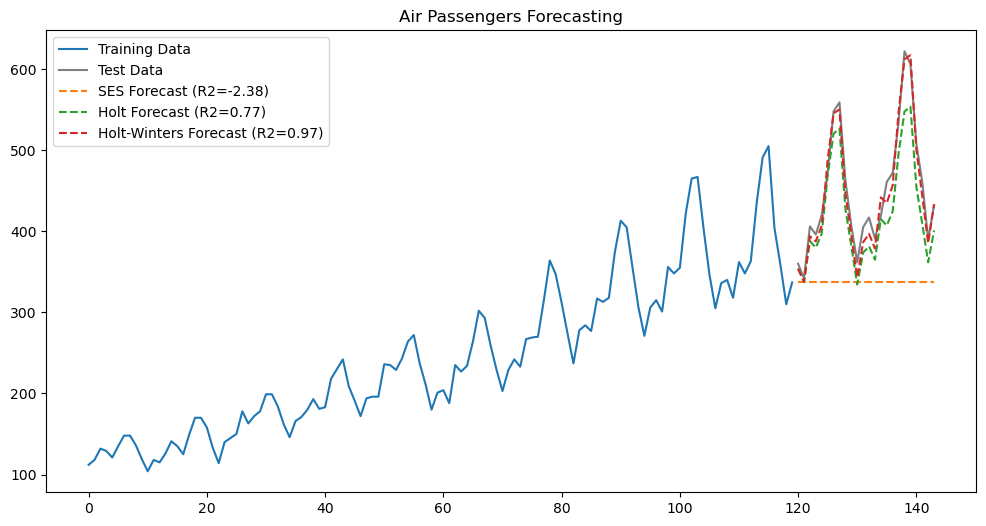

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import r2_score

# Load the Air Passengers dataset
data = sns.load_dataset('flights')
passengers = data['passengers']

# Split the data into training and testing sets
train_data = passengers[:120]  # 1949-01 to 1958-12 (10 years)
test_data = passengers[120:]   # 1959-01 to 1960-12 (2 years)

# Simple Exponential Smoothing
model_ses = SimpleExpSmoothing(train_data).fit(optimized=True)
forecast_ses = model_ses.forecast(steps=len(test_data))
r2_ses = r2_score(test_data, forecast_ses)

# Holt's Method (Double Exponential Smoothing)
model_holt = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)
forecast_holt = model_holt.forecast(steps=len(test_data))
r2_holt = r2_score(test_data, forecast_holt)

# Holt-Winters Method (Triple Exponential Smoothing)
model_hw = ExponentialSmoothing(train_data, trend='mul', seasonal='mul', seasonal_periods=12).fit(optimized=True)
forecast_hw = model_hw.forecast(steps=len(test_data))
r2_hw = r2_score(test_data, forecast_hw)

# Print the R2 scores
print(f"R2 Score (SES): {r2_ses:.2f}")
print(f"R2 Score (Holt): {r2_holt:.2f}")
print(f"R2 Score (Holt-Winters): {r2_hw:.2f}")

# Ploat the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data', color='gray')
plt.plot(forecast_ses, label=f'SES Forecast (R2={r2_ses:.2f})', linestyle='--')
plt.plot(forecast_holt, label=f'Holt Forecast (R2={r2_holt:.2f})', linestyle='--')
plt.plot(forecast_hw, label=f'Holt-Winters Forecast (R2={r2_hw:.2f})', linestyle='--')
plt.legend(loc='best')
plt.title('Air Passengers Forecasting')
plt.show()


In [33]:
print(model_hw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               passengers   No. Observations:                  120
Model:             ExponentialSmoothing   SSE                          10805.203
Optimized:                         True   AIC                            572.035
Trend:                   Multiplicative   BIC                            616.635
Seasonal:                Multiplicative   AICC                           578.807
Seasonal Periods:                    12   Date:                 Tue, 09 Apr 2024
Box-Cox:                          False   Time:                         17:07:42
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3796569                alpha                 True
smoothing_trend          

Prophet model for facebook: https://facebook.github.io/prophet/

We analysed Univariate Forecasting in this tutorial.

In [34]:
!pip install TBATS

  Obtaining dependency information for TBATS from https://files.pythonhosted.org/packages/63/94/1949dc644c3fa05b736b988dc8058122f8c0187778ff9f18070bce2d4ddd/tbats-1.1.3-py3-none-any.whl.metadata
  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/44.0 kB ? eta -:--:--
   ---------------------------------------- 44.0/44.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------- ----------------------------- 163.8/614.7 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 6.5 MB/s eta 0:00:00


<b>TBATS (Trigonometric Seasonal Box-Cox transformation, ARMA errors, Trend and Seasonal components) </b> is a time series forecasting method that extends the popular exponential smoothing (ETS) framework by incorporating multiple seasonal periods and non-linear transformations. 

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


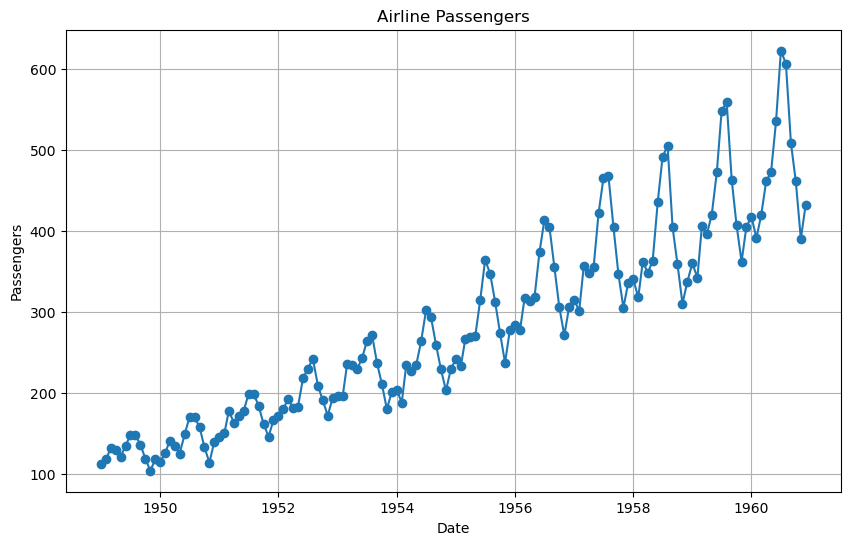

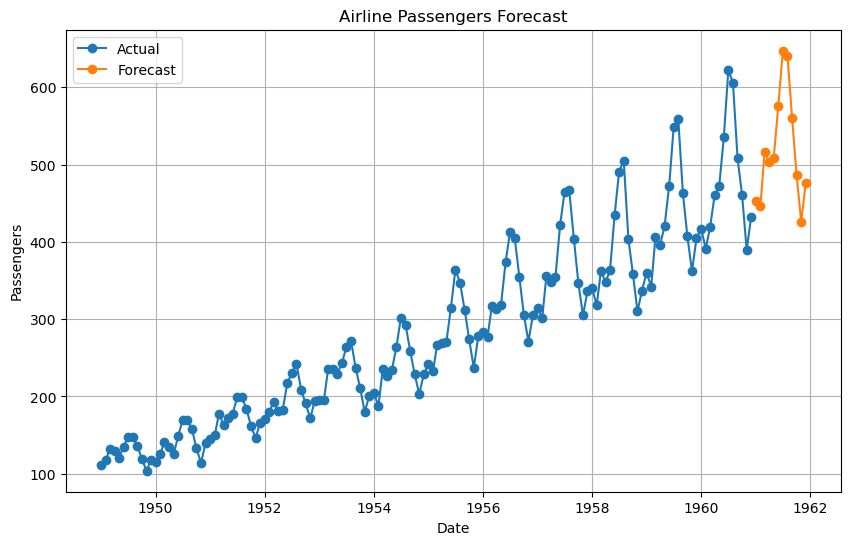

In [35]:
# Importing required Python libraries
import pandas as pd
from tbats import TBATS
import matplotlib.pyplot as plt

# Load the dataset from the website
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)

# Display first few rows of the dataset
print(df.head())

# Plot the original data
plt.figure(figsize = (10, 6))
plt.plot(df.index, df['Passengers'], marker = 'o', linestyle = '-')
plt.title('Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

# Fit TBATS model
model = TBATS(seasonal_periods = (12, 24))
fit = model.fit(df['Passengers'])

# Generate forecast
forecast = fit.forecast(steps=12)  # Forecast for the next 12 months

# Generate dates for the forecast
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=13, freq='MS')[1:]  # Exclude the first date

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], marker='o', linestyle='-', label='Actual')
plt.plot(forecast_dates, forecast, marker='o', linestyle='-', label='Forecast')
plt.title('Airline Passengers Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()


## Try TBAST model with other dataset

In [38]:
# Read the data set into a Pandas data frame. Note that the Date column (column 0) is the index column and it has 
# the format mm-dd-yyyy.
df_1 = pd.read_csv('retail_sales_used_car_dealers_us_1992_2020.csv', index_col = [0])

# By default, date columns are represented as object when loading data from a CSV file. To read the date column correctly, 
# we can use the argument parse_dates to specify a list of date columns.

df_1.head(20)

,Retail_Sales
DATE,
01-01-92,1744
01-02-92,1990
01-03-92,2177
01-04-92,2601
01-05-92,2171
01-06-92,2207
01-07-92,2251
01-08-92,2087
01-09-92,2016


TypeError: tz must be string or tzinfo subclass.

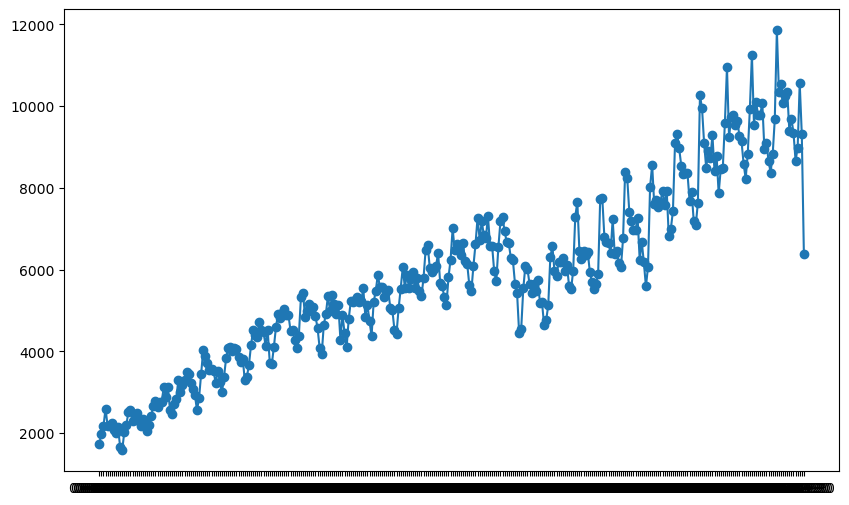

In [37]:
model = TBATS(seasonal_periods = (12, 24))
fit = model.fit(df_1['Retail_Sales'])

# Generate forecast
forecast = fit.forecast(steps=12)  # Forecast for the next 12 months

# Generate dates for the forecast
last_date = df_1.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=13, freq='MS')[1:]  # Exclude the first date

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_1.index, df_1['Retail_Sales'], marker='o', linestyle='-', label='Actual')
plt.plot(forecast_dates, forecast, marker='o', linestyle='-', label='Forecast')
plt.title('Retail sale Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## Reference: 
    https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572
    https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873